# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Load Dataset

In [2]:
iris = datasets.load_iris()

In [4]:
X = iris.data[:, 2:4]
X[:5]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

In [6]:
y = iris.target
y[:5]

array([0, 0, 0, 0, 0])

# Split data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=1, stratify=y)

In [10]:
print(f'X_train.shape = {X_train.shape}')
print(f'X_test.shape = {X_test.shape}')

X_train.shape = (105, 2)
X_test.shape = (45, 2)


# Standardized Data


In [13]:
scaler = StandardScaler()
X_train_t = scaler.fit_transform(X_train)
X_test_t = scaler.transform(X_test)

# Train model

In [20]:
model = GaussianNB()
model.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [21]:
## fitting model
model.fit(X_train_t, y_train)

GaussianNB()

In [24]:
## predict
y_pred = model.predict(X_test_t)
y_pred[:5]

array([2, 0, 0, 1, 1])

In [26]:
## Miss Classified
sumMiss = (y_pred != y_test).sum()
print(f'Miss Classified = {sumMiss}')

Miss Classified = 1


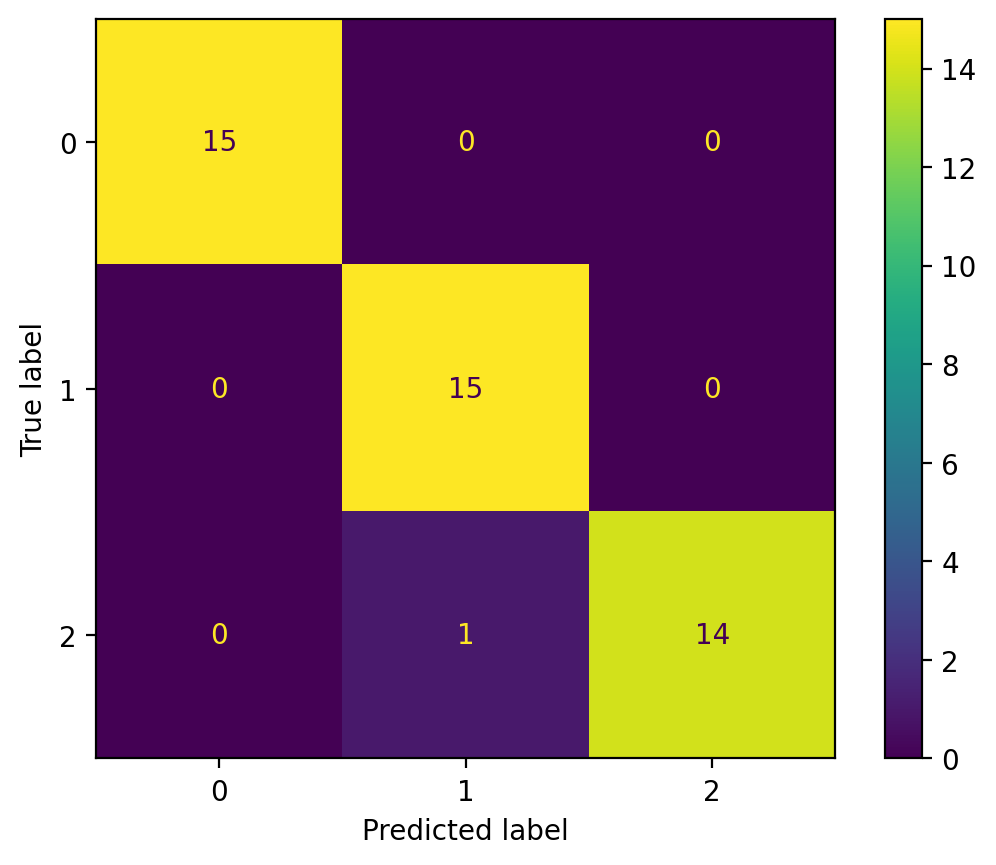

In [29]:
## confusion metrix
cm = metrics.confusion_matrix(y_test, y_pred)
fig = metrics.ConfusionMatrixDisplay(cm).plot()

In [30]:
## classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



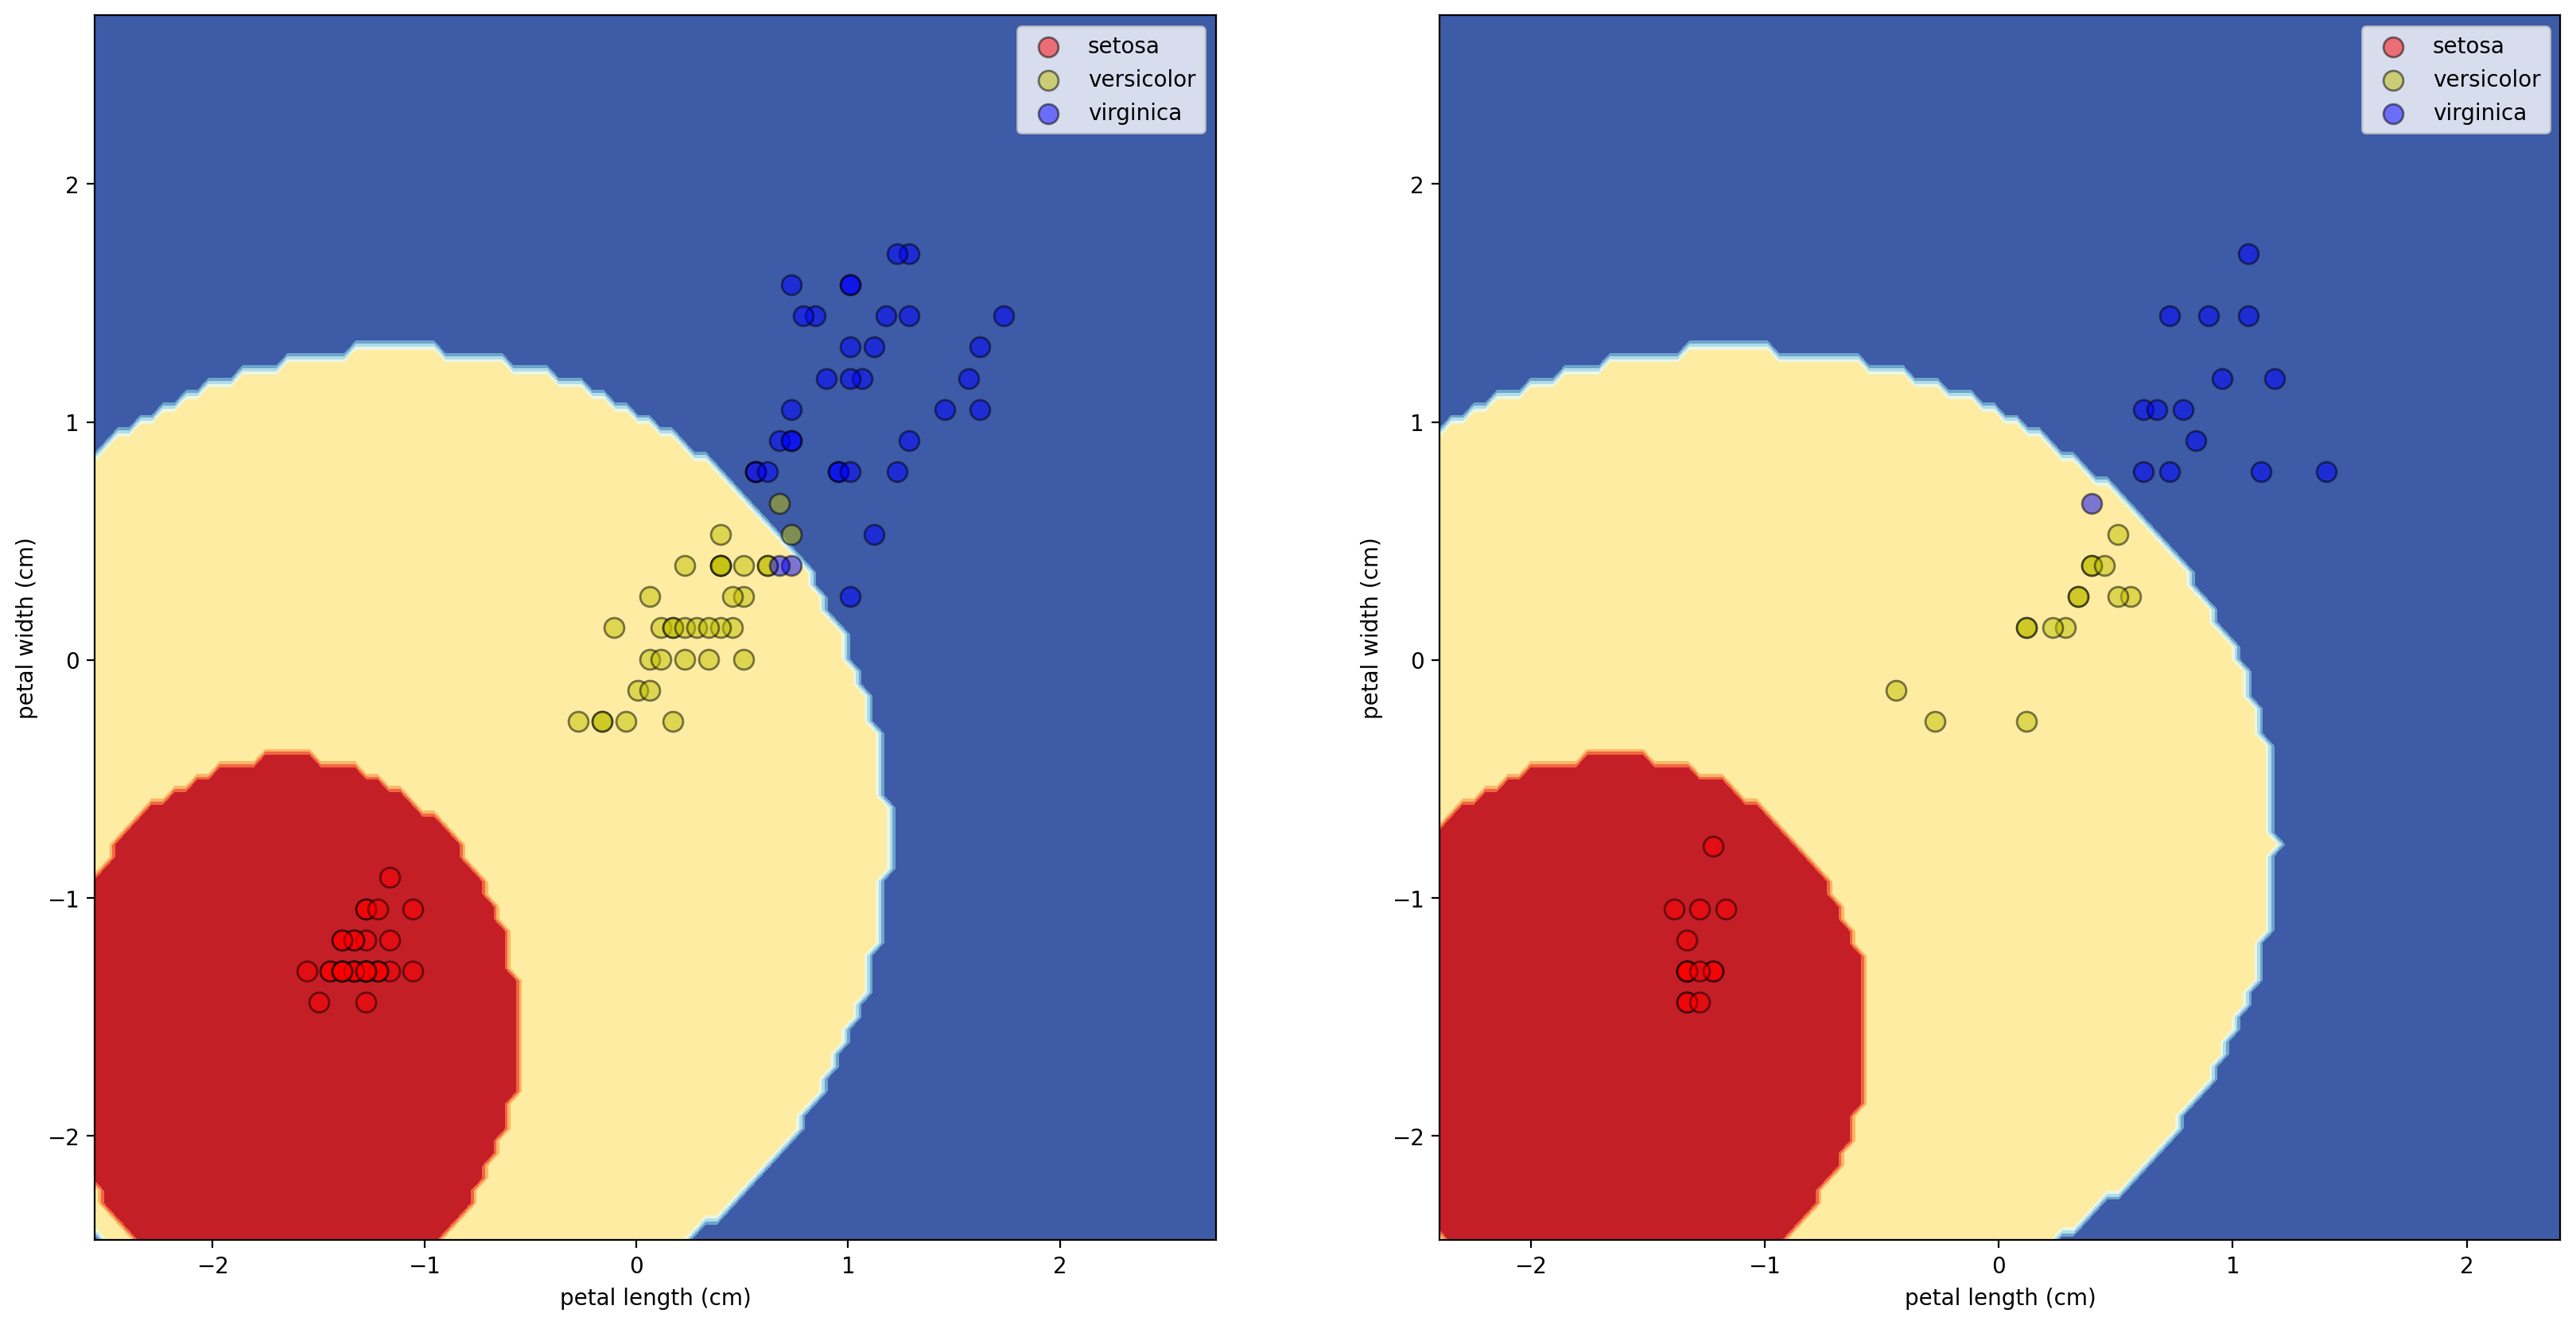

In [69]:
from sklearn.inspection import DecisionBoundaryDisplay

n_class = 3
c_code = 'ryb'

fig, ax = plt.subplots(1, 2, figsize = (20, 10))
y_train_pred = model.predict(X_train_t)
y_test_pred = model.predict(X_test_t)

result = [('Train Dataset', X_train_t, y_train), ('Test Dataset', X_test_t,  y_test)]

for i, e in enumerate(result):
    DecisionBoundaryDisplay.from_estimator(
        model,
        e[1],
        response_method='predict',
        ax = ax[i],
        xlabel= iris.feature_names[2],
        ylabel= iris.feature_names[3],
        cmap=plt.cm.RdYlBu
    )
    
    for k, c in zip(range(n_class), c_code):
        idx = np.where(e[2] == k)
        ax[i].scatter(
            e[1][idx, 0],
            e[1][idx, 1],
            s = 80,
            c = c,
            label = iris.target_names[k],
            edgecolor="black",
            alpha = .5
        )

    ax[i].legend()
